# Autoencoding

## One-hot Encoder

In [1]:
from conx import *

conx, version 3.2.3
Using Theano backend.


In [2]:
size = 5

In [3]:
net = Network("Autoencoder")
net.add(Layer("input", size, minmax=(0,1)))
net.add(Layer("hidden", 5, activation="relu", visible=True))
net.add(Layer("output", size, activation="sigmoid"))
net.config["font_family"] = "monospace"

In [4]:
net.connect()

In [5]:
net.compile(error='binary_crossentropy', optimizer="adam")

In [6]:
net

<IPython.core.display.Javascript object>

<Network name='Autoencoder' (compiled)>

In [7]:
patterns = [onehot(i, size) for i in range(size)]

In [8]:
patterns[0]

[1, 0, 0, 0, 0]

In [9]:
net.dataset.load([(p,p) for p in patterns])

In [10]:
net

<IPython.core.display.Javascript object>

<Network name='Autoencoder' (compiled)>

In [11]:
import time
for i in range(size):
    net.propagate(net.dataset.inputs[i])
    time.sleep(1)

In [12]:
net.dataset.summary()

Input Summary:
   count  : 5 (5 for training, 0 for testing)
   shape  : (5,)
   range  : (0.0, 1.0)
Target Summary:
   count  : 5 (5 for training, 0 for testing)
   shape  : (5,)
   range  : (0.0, 1.0)


In [13]:
net.train(accuracy=1, epochs=10000, report_rate=200, tolerance=0.4)

Training...
Epoch #  200 | train error 0.57706 | train accuracy 0.80000 | validate% 0.00000
Epoch #  400 | train error 0.47392 | train accuracy 0.88000 | validate% 0.20000
Epoch #  600 | train error 0.37294 | train accuracy 0.92000 | validate% 0.20000
Epoch #  800 | train error 0.29373 | train accuracy 0.88000 | validate% 0.60000
Epoch # 1000 | train error 0.22443 | train accuracy 0.88000 | validate% 0.60000
Epoch # 1200 | train error 0.16399 | train accuracy 0.96000 | validate% 0.60000
Epoch # 1400 | train error 0.11628 | train accuracy 1.00000 | validate% 0.80000
Epoch # 1600 | train error 0.08301 | train accuracy 1.00000 | validate% 0.80000
Epoch # 1605 | train error 0.08229 | train accuracy 1.00000 | validate% 1.00000


In [14]:
net.propagate(net.dataset.inputs[0])

[0.8052372932434082,
 0.04953927919268608,
 0.00020874451729469,
 0.02787386253476143,
 0.0008814419852569699]

In [15]:
net.test(tolerance=0.4)

Testing on training dataset...
# | inputs | targets | outputs | result
---------------------------------------
0 | [1.00,0.00,0.00,0.00,0.00] | [1.00,0.00,0.00,0.00,0.00] | [0.81,0.05,0.00,0.03,0.00] | correct
1 | [0.00,1.00,0.00,0.00,0.00] | [0.00,1.00,0.00,0.00,0.00] | [0.40,0.70,0.11,0.03,0.03] | correct
2 | [0.00,0.00,1.00,0.00,0.00] | [0.00,0.00,1.00,0.00,0.00] | [0.01,0.03,0.91,0.04,0.05] | correct
3 | [0.00,0.00,0.00,1.00,0.00] | [0.00,0.00,0.00,1.00,0.00] | [0.04,0.00,0.01,0.92,0.01] | correct
4 | [0.00,0.00,0.00,0.00,1.00] | [0.00,0.00,0.00,0.00,1.00] | [0.05,0.00,0.08,0.07,0.86] | correct
Total count: 5
      correct: 5
      incorrect: 0
Total percentage correct: 1.0


In [16]:
for i in range(size):
    net.propagate(net.dataset.inputs[i])
    time.sleep(1)

In [17]:
net.dashboard()

<IPython.core.display.Javascript object>

Tab(children=(VBox(children=(HTML(value='<p style="text-align:center"><svg id=\'Autoencoder\' xmlns=\'http://www.w3.org/2000/svg\' viewBox="0 0 350 235" height="780" image-rendering="pixelated">\n    <defs>\n        <marker id="arrow" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto" markerUnits="strokeWidth">\n          <path d="M0,0 L0,6 L9,3 z" fill="black" />\n        </marker>\n    </defs><text x="175.0" y="12.5" font-family="monospace" font-size="15" text-anchor="middle" alignment-baseline="central">Autoencoder</text><rect x="74.0" y="29" width="202" height="42" style="fill:none;stroke:black;stroke-width:2"/><image id="Autoencoder_output_7" class="Autoencoder_output" x="75.0" y="30" height="40" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhBQABAIcAAGcAH3sGIooLJISEhAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAABQABAAAICAAHCAAQAEBAADs="><title>Layer: output (output)\n shape = (5,)\n Keras class = Dense\n activation = sigmoid</title></image><text x="280.0" y="52.0" font-family="monospace" font-size="12" text-anchor="start" alignment-baseline="central">output</text><line x1="175.0" y1="99" x2="175.0" y2="72" stroke="black" stroke-width="2" marker-end="url(#arrow)"><title>Weights from hidden to output\n output/kernel has shape (5, 5)\n output/bias has shape (5,)</title></line><rect x="74.0" y="99" width="202" height="42" style="fill:none;stroke:black;stroke-width:2"/><image id="Autoencoder_hidden_8" class="Autoencoder_hidden" x="75.0" y="100" height="40" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhBQABAIcAAGcAHxoaGujo6P707gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAABQABAAAICAADAAAgYEBAADs="><title>Layer: hidden (hidden)\n shape = (5,)\n Keras class = Dense\n activation = relu</title></image><text x="280.0" y="122.0" font-family="monospace" font-size="12" text-anchor="start" alignment-baseline="central">hidden</text><line x1="175.0" y1="169" x2="175.0" y2="142" stroke="black" stroke-width="2" marker-end="url(#arrow)"><title>Weights from input to hid

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## MNIST Autoencoding

In [1]:
from conx import *

conx, version 3.2.3
Using Theano backend.


In [2]:
net = Network("MNIST-Autoencoder")

In [3]:
net.add(ImageLayer("input", (28,28), 1))
net.add(Conv2DLayer("conv", 3, (5,5), activation="relu"))
net.add(MaxPool2DLayer("pool", pool_size=(2,2)))
net.add(FlattenLayer("flatten"))
net.add(Layer("hidden3", 25, activation="relu"))
net.add(Layer("output", (28,28,1), activation="sigmoid"))

In [4]:
net.connect()
net.compile(error="mse", optimizer="adam")
net

<IPython.core.display.Javascript object>

<Network name='MNIST-Autoencoder' (compiled)>

In [5]:
net.dataset.get('mnist')
net.dataset.set_targets_from_inputs()
net.dataset.targets.reshape(0, (28 * 28))
net.dataset.summary()

Input Summary:
   count  : 70000 (70000 for training, 0 for testing)
   shape  : (28, 28, 1)
   range  : (0.0, 1.0)
Target Summary:
   count  : 70000 (70000 for training, 0 for testing)
   shape  : (784,)
   range  : (0.0, 1.0)


In [6]:
net.dashboard()

<IPython.core.display.Javascript object>

Tab(children=(VBox(children=(HTML(value='<p style="text-align:center"><svg id=\'MNIST-Autoencoder\' xmlns=\'http://www.w3.org/2000/svg\' viewBox="0 0 350 1055" height="780" image-rendering="pixelated">\n    <defs>\n        <marker id="arrow" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto" markerUnits="strokeWidth">\n          <path d="M0,0 L0,6 L9,3 z" fill="black" />\n        </marker>\n    </defs><text x="175.0" y="12.5" font-family="monospace" font-size="15" text-anchor="middle" alignment-baseline="central">MNIST-Autoencoder</text><rect x="74.0" y="29" width="202" height="202" style="fill:none;stroke:black;stroke-width:2"/><image id="MNIST-Autoencoder_output_7" class="MNIST-Autoencoder_output" x="75.0" y="30" height="200" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhHAAcAIcAAPz5+Prt5gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAAHAAcAEAIegABCBxIcGAAAAgTAggAoKHDhxAjSpxIsaJFAAEAaNzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6ZNjQEA6NzJs6fPn0B7BgBAtKjRo0cDAFjKtKnTp1CjSp1K9WkAAFizat3KtWvWAADCih1LtqzZs2jTig0IADs="><title>Layer: output (output)\n shape = (28, 28, 1)\n Keras class = Dense\n activation = sigmoid</title></image><text x="280.0" y="132.0" font-family="monospace" font-size="12" text-anchor="start" alignment-baseline="central">output</text><line x1="175.0" y1="259" x2="175.0" y2="232" stroke="black" stroke-width="2" marker-end="url(#arrow)"><title>Weights from hidden3 to output\n output/kernel has shape (25, 784)\n output/bias has shape (784,)</title></line><rect x="74.0" y="259" width="202" height="27" style="fill:none;stroke:black;stroke-width:2"/><image id="MNIST-Autoencoder_hidden3_8" class="MNIST-Autoencoder_hidden3" x="75.0" y="260" height="25" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhGQABAIcAAGcAH3gFIcI5OhoaGllZWaoVKb+/v9TU1OuQcva0lvnHrvzWwejo6P7+/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAAGQABAAAIHgAbAFAQIAAABgQOAABgAIDDBQMEAAAgAECCAggCAgA7"><title>Layer: hidden3 (hidden)\n shape = (25,)\n Keras class = Dense\n activation = relu</title></image><text x="280.0" y="274

Feature 0
Feature 1
Feature 2

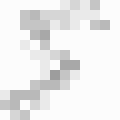
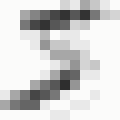
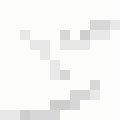

In [7]:
net.propagate_to_features("pool", net.dataset.inputs[0], cols=1, scale=10)

In [8]:
import numpy as np
from conx import get_form
image = np.random.rand(784).reshape((28, 28, 1))

In [9]:
get_form(net.propagate(image))

[[[numbers.Number, 1], 28], 28]

In [10]:
output = net.propagate_to_image("output", image)
output.size

(28, 28)

In [11]:
net.propagate_to("hidden3", image)

[0.6238702535629272,
 0.0,
 0.0,
 0.0,
 0.653206467628479,
 0.0,
 0.7518496513366699,
 0.3881341814994812,
 1.2514455318450928,
 0.0,
 0.0,
 1.102600336074829,
 0.0,
 0.0,
 0.0,
 0.13875724375247955,
 0.4268752932548523,
 0.6694626808166504,
 0.23066118359565735,
 0.0,
 0.0,
 0.20673391222953796,
 0.2686443328857422,
 0.12682291865348816,
 0.0]

In [13]:
net.dataset.slice(10)

In [14]:
net.train(accuracy=0.5, epochs=1000, report_rate=100, tolerance=.4)

Training...
Epoch #  100 | train error 0.03947 | train accuracy 0.00000 | validate% 0.00000
Epoch #  200 | train error 0.00952 | train accuracy 0.00000 | validate% 0.00000
Epoch #  300 | train error 0.00393 | train accuracy 0.00000 | validate% 0.10000
Epoch #  400 | train error 0.00280 | train accuracy 0.00000 | validate% 0.20000
Epoch #  500 | train error 0.00213 | train accuracy 0.00000 | validate% 0.20000
Epoch #  600 | train error 0.00184 | train accuracy 0.00000 | validate% 0.20000
Epoch #  700 | train error 0.00162 | train accuracy 0.00000 | validate% 0.30000
Epoch #  800 | train error 0.00151 | train accuracy 0.00000 | validate% 0.30000
Epoch #  900 | train error 0.00129 | train accuracy 0.00000 | validate% 0.30000
Epoch # 1000 | train error 0.00126 | train accuracy 0.00000 | validate% 0.30000
Epoch # 1000 | train error 0.00126 | train accuracy 0.00000 | validate% 0.30000


In [15]:
for i in range(10):
    net.propagate(net.dataset.inputs[i])

In [17]:
net.test(show_inputs=False, show_outputs=False)

Testing on training dataset...
# | result
---------------------------------------
0 | X
1 | X
2 | X
3 | correct
4 | X
5 | X
6 | X
7 | X
8 | X
9 | X
Total count: 10
      correct: 1
      incorrect: 9
Total percentage correct: 0.1
